In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape

(506, 13)

In [5]:
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
target = pd.Series(boston['target'])
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [8]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

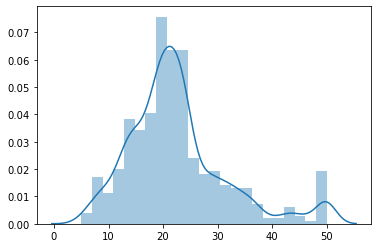

In [9]:
sns.distplot(target)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


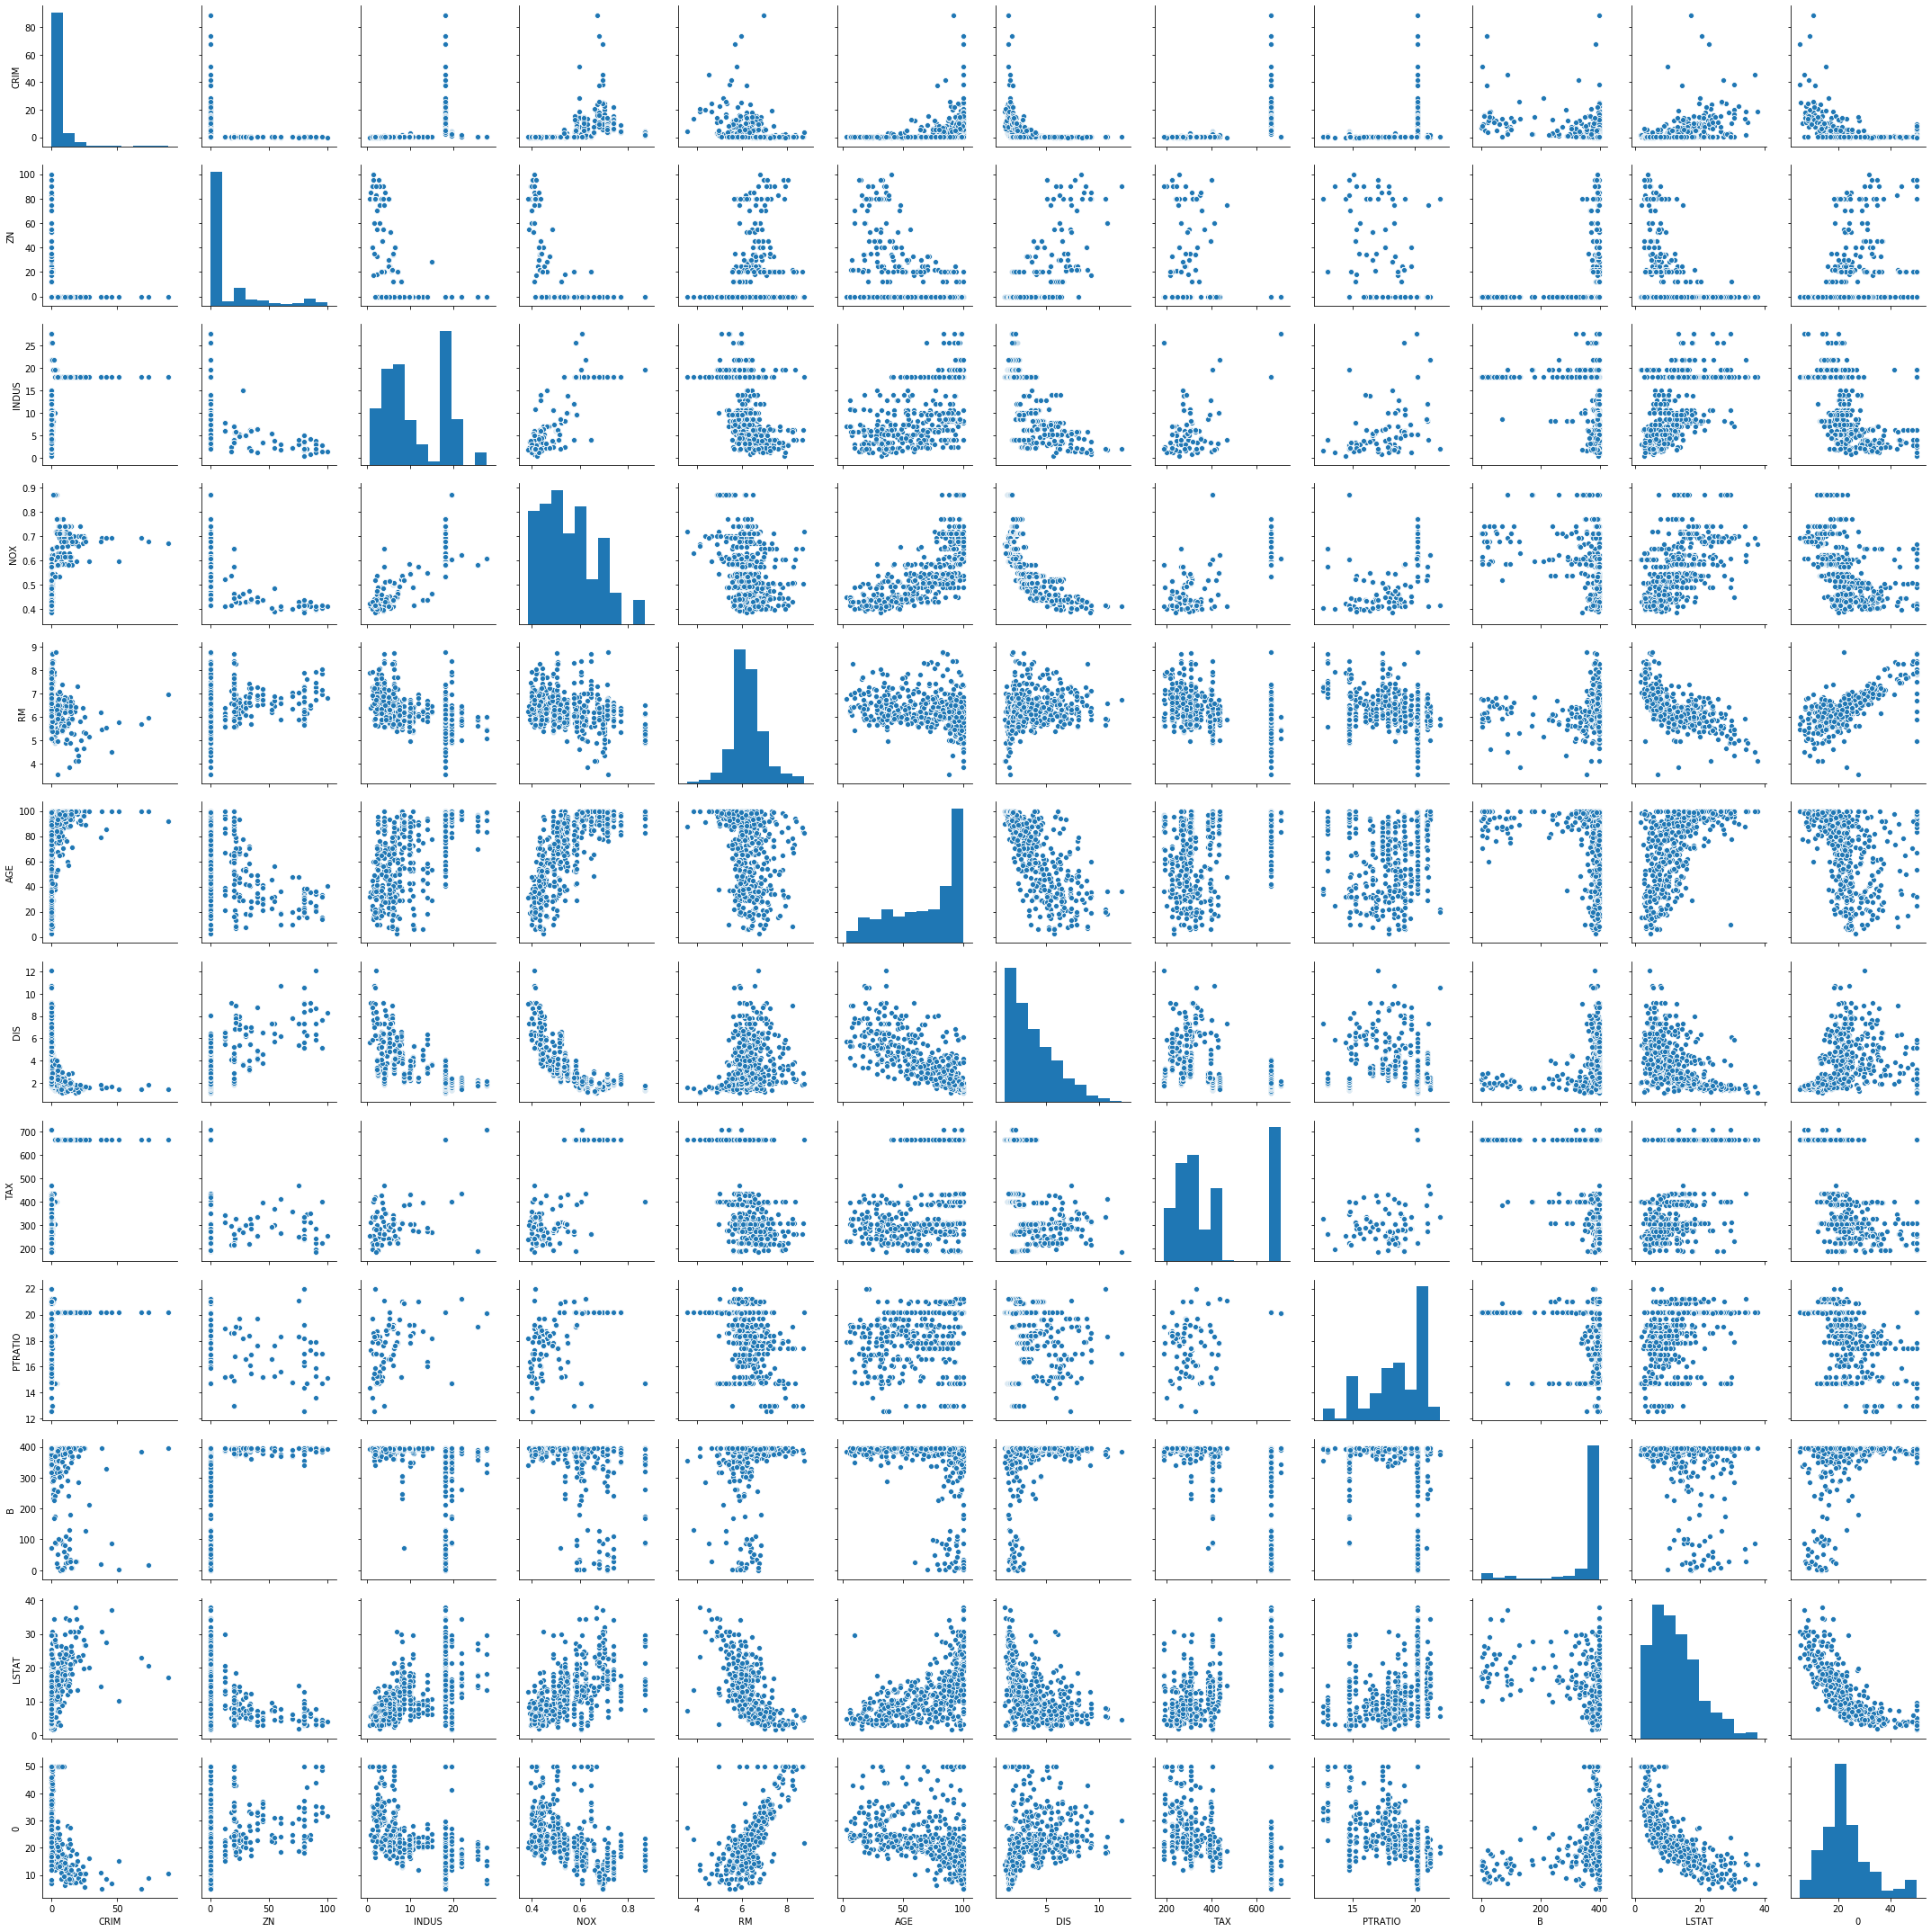

In [11]:
sns.pairplot(pd.concat([data.drop(['CHAS', 'RAD'], axis = 1), target], axis =1))

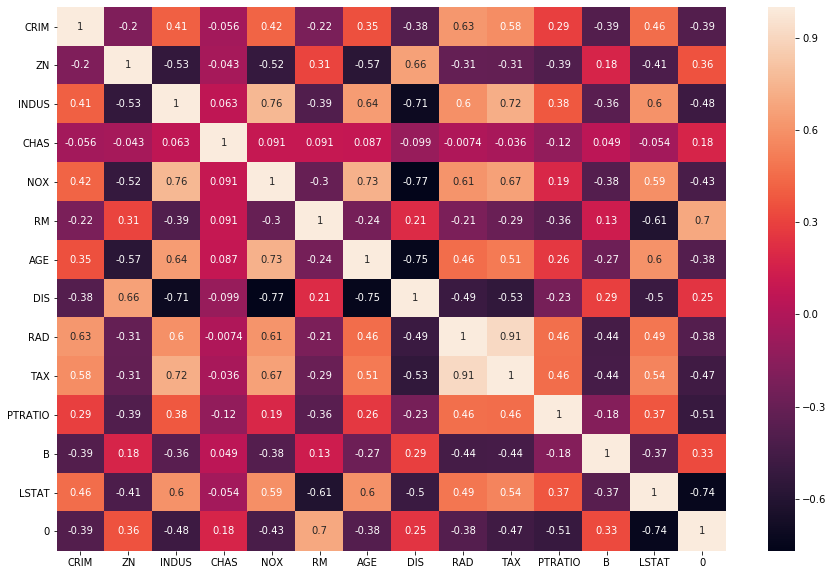

In [12]:
from matplotlib.pyplot import figure
figure(figsize = (15,10))
sns.heatmap(pd.concat([data, target], axis =1).corr(), annot = True)

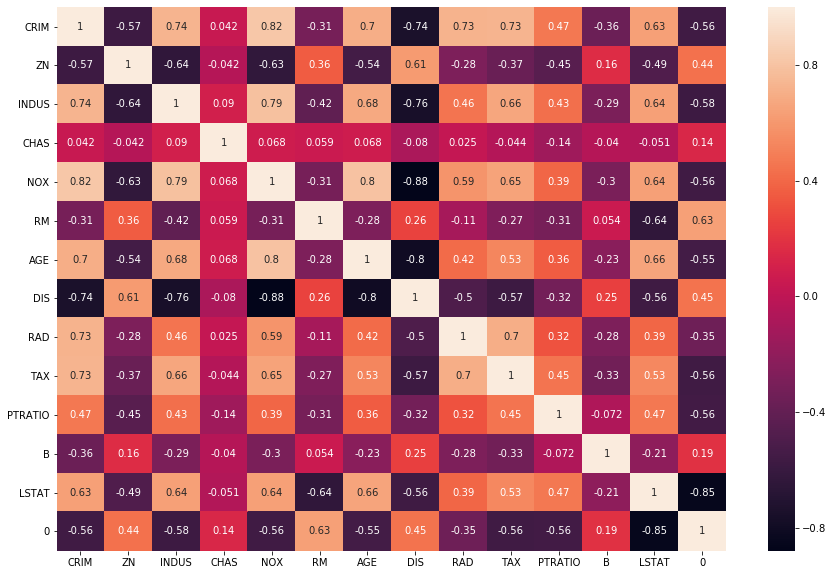

In [13]:
figure(figsize = (15,10))
sns.heatmap(pd.concat([data, target], axis =1).corr('spearman'), annot = True)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 101)

In [15]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
86,0.05188,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40


In [16]:
X_train.shape

(354, 13)

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32


In [19]:
lm.predict(X_test)

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

In [20]:
lm.intercept_

40.218929012551165

In [21]:
pd.DataFrame(index = X_train.columns, data = lm.coef_, columns=['Coefficient'])

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


In [22]:
import statsmodels.api as sm
from statsmodels.api import OLS

sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     77.27
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.52e-93
Time:                        09:35:52   Log-Likelihood:                -1027.8
No. Observations:                 354   AIC:                             2084.
Df Residuals:                     340   BIC:                             2138.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2189      5.792      6.944      0.000      28.826      51.611
CRIM          -0.0885      0.039     -2.291      0.023      -0.164      -0.013
ZN             0.0503      0.017      2.954      0.003       0.017       0.084
INDUS          0.0203      0.065      0.312      0.755      -0.108       0.149
CHAS           3.7543      0.992      3.784      0.000       1.803       5.706
NOX          -17.7484      4.261     -4.165      0.000     -26.129      -9.367
RM             3.2478      0.491      6.615      0.000       2.282       4.213
AGE            0.0120      0.015      0.805      0.421      -0.017       0.041
DIS           -1.4092      0.229     -6.165      0.000      -1.859      -0.960
RAD            0.2639      0.070      3.747      0.000       0.125       0.402
TAX           -0.0103      0.004     -2.661      0.008      -0.018      -0.003
PTRATIO       -0.9518      0.150     -6.341      0.000      -1.247      -0.657
B              0.0061      0.003      1.997      0.047    9.21e-05       0.012
LSTAT         -0.5971      0.061     -9.848      0.000      -0.716      -0.478
==============================================================================
Omnibus:                      149.127   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.569
Skew:                           1.739   Prob(JB):                    2.08e-162
Kurtosis:                       9.196   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
result.params/result.bse

const      6.943996
CRIM      -2.290799
ZN         2.953575
INDUS      0.312029
CHAS       3.784118
NOX       -4.165363
RM         6.615024
AGE        0.805096
DIS       -6.164935
RAD        3.746983
TAX       -2.660856
PTRATIO   -6.341090
B          1.997050
LSTAT     -9.847700
dtype: float64

In [25]:
result.params

const      40.218929
CRIM       -0.088505
ZN          0.050293
INDUS       0.020348
CHAS        3.754271
NOX       -17.748371
RM          3.247765
AGE         0.012001
DIS        -1.409161
RAD         0.263881
TAX        -0.010344
PTRATIO    -0.951781
B           0.006116
LSTAT      -0.597133
dtype: float64

In [26]:
result.resid

204     7.656161
370    14.326085
485    -0.489771
86      0.953943
241    -3.459697
         ...    
63      3.064856
326    -0.257976
337    -0.515122
11     -2.672284
351     3.049415
Length: 354, dtype: float64

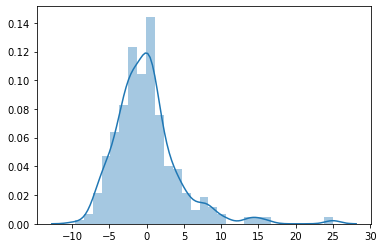

In [27]:
sns.distplot(result.resid)

In [28]:
#Inspecting if our residual following the normal distribution or not
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result.resid)

{'Anderson': {15.0: 0.57,
  10.0: 0.649,
  5.0: 0.778,
  2.5: 0.908,
  1.0: 1.08,
  'stat': 7.121653411354146},
 'Shapiro': 2.1265458825418327e-15,
 'K^2': 4.145294826538996e-33}

In [29]:
# Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(result.resid , lags = 1) 

(array([1.65594113]), array([0.19815224]))

In [30]:
# Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 0.9485050178253095), ('p-value', 0.6319231501222244)]

In [31]:
## Inspecting the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
pd.Series(vif, index = X_train.columns, name ='VIF')

CRIM        2.093811
ZN          2.681535
INDUS      13.338722
CHAS        1.163130
NOX        73.022057
RM         81.549223
AGE        21.743935
DIS        14.684784
RAD        13.972209
TAX        52.454066
PTRATIO    88.730408
B          20.377890
LSTAT      12.441947
Name: VIF, dtype: float64

In [32]:
target.name = 'Price'
pd.concat([data,target], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [33]:
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm
from statsmodels.api import OLS


boston = load_boston()
boston.keys()
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
target = pd.Series(boston['target'])

sm_lm = OLS(target, sm.add_constant(data))
result = sm_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        09:35:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Overfitting

Dimana model kita mempelajari data terlalu spesifik sehingga model yang didapatkan under perform terhadap data yang baru (Variance tinggi, dalam artian model terlalu kompleks serta datanya terlalu banyak variasi) -> Curse of Dimensionality 
(Kurangi Features dan/atau penambahan data)

# Underfitting

Model kita tidak mempelajari data dengan baik sehingga underperform. -> Bias yang tinggi, Kurang variasi di data.
(Tambahin Features dan data)

In [34]:
#Inspecting if our residual following the normal distribution or not
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result.resid)

{'Anderson': {15.0: 0.572,
  10.0: 0.651,
  5.0: 0.781,
  2.5: 0.911,
  1.0: 1.084,
  'stat': 10.520674848600493},
 'Shapiro': 1.480129525706051e-17,
 'K^2': 2.1820375391705698e-39}

In [35]:
# Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(result.resid , lags = 1) 

(array([105.0356889]), array([1.19955708e-24]))

In [36]:
# Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 2.4311473253497464), ('p-value', 7.302071915608556e-12)]

In [37]:
## Inspecting the VIF 
vif = [variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
pd.Series(vif, index = X_train.columns, name ='VIF')

CRIM        2.093811
ZN          2.681535
INDUS      13.338722
CHAS        1.163130
NOX        73.022057
RM         81.549223
AGE        21.743935
DIS        14.684784
RAD        13.972209
TAX        52.454066
PTRATIO    88.730408
B          20.377890
LSTAT      12.441947
Name: VIF, dtype: float64

In [38]:
sm_lm = OLS(target, sm.add_constant(data[['CRIM','LSTAT', 'INDUS', 'DIS', 'RAD']]))
result = sm_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     145.5
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.17e-95
Time:                        09:35:55   Log-Likelihood:                -1613.0
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3263.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7816      1.278     33.467      0.000      40.270      45.293
CRIM          -0.0989      0.040     -2.458      0.014      -0.178      -0.020
LSTAT         -0.9104      0.048    -18.800      0.000      -1.006      -0.815
INDUS         -0.3232      0.063     -5.156      0.000      -0.446      -0.200
DIS           -1.3040      0.179     -7.271      0.000      -1.656      -0.952
RAD            0.0185      0.044      0.418      0.676      -0.068       0.105
==============================================================================
Omnibus:                      126.460   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.929
Skew:                           1.348   Prob(JB):                     8.05e-58
Kurtosis:                       5.282   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
try_normal(result.resid)

{'Anderson': {15.0: 0.572,
  10.0: 0.651,
  5.0: 0.781,
  2.5: 0.911,
  1.0: 1.084,
  'stat': 14.861344540648247},
 'Shapiro': 4.973267509429613e-18,
 'K^2': 3.463766216033713e-28}

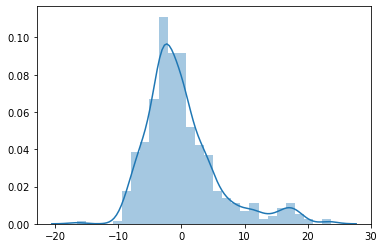

In [40]:
sns.distplot(result.resid)

In [41]:
#Outlier detection based on the standarized residual
influence = result.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([data,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Studentized Residuals
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-1.394888
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-0.701430
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.733285
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.314833
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.161913


In [42]:
idx_drop = resid[(resid['Studentized Residuals'] > 3) | (resid['Studentized Residuals'] < -3)].index
data.loc[idx_drop]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53


In [43]:
sm_lm = OLS(target, sm.add_constant(data[['CRIM', 'LSTAT']]))
result = sm_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     304.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           2.33e-87
Time:                        09:35:56   Log-Likelihood:                -1639.6
No. Observations:                 506   AIC:                             3285.
Df Residuals:                     503   BIC:                             3298.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3192      0.574     59.816      0.000      33.192      35.446
CRIM          -0.0704      0.036     -1.956      0.051      -0.141       0.000
LSTAT         -0.9114      0.043    -21.004      0.000      -0.997      -0.826
==============================================================================
Omnibus:                      146.159   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.172
Skew:                           1.517   Prob(JB):                     3.32e-72
Kurtosis:                       5.531   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
try_normal(result.resid)

{'Anderson': {15.0: 0.572,
  10.0: 0.651,
  5.0: 0.781,
  2.5: 0.911,
  1.0: 1.084,
  'stat': 19.299149703807984},
 'Shapiro': 3.4785015940560464e-20,
 'K^2': 1.8284171257707918e-32}

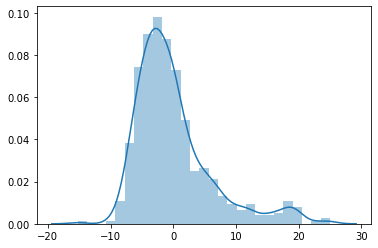

In [45]:
sns.distplot(result.resid)

In [46]:
data[['CRIM', 'ZN', 'CHAS']].corr()

,CRIM,ZN,CHAS
CRIM,1.000000,-0.200469,-0.055892
ZN,-0.200469,1.000000,-0.042697
CHAS,-0.055892,-0.042697,1.000000


In [47]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)

In [48]:
try_normal(X_train['CRIM'])

{'Anderson': {15.0: 0.57,
  10.0: 0.649,
  5.0: 0.778,
  2.5: 0.908,
  1.0: 1.08,
  'stat': 57.289705411424166},
 'Shapiro': 1.5674762251901436e-31,
 'K^2': 1.771882571231006e-96}

In [49]:
#Transformasi data ke logaritmic natural (euler number = 2.72)
X_train['CRIM'] = transformer.fit_transform(np.array(X_train['CRIM']).reshape(1,-1))[0]

In [50]:
try_normal(X_train['CRIM'])

{'Anderson': {15.0: 0.57,
  10.0: 0.649,
  5.0: 0.778,
  2.5: 0.908,
  1.0: 1.08,
  'stat': 34.816043222755866},
 'Shapiro': 5.070971574377557e-22,
 'K^2': 2.636840663279857e-13}

In [51]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
204,0.019891,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
370,2.020058,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
485,1.541945,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
86,0.050579,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
241,0.100858,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.119115,25.0,5.13,0.0,0.4530,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
326,0.265030,0.0,7.38,0.0,0.4930,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
337,0.029957,0.0,5.19,0.0,0.5150,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
11,0.111067,12.5,7.87,0.0,0.5240,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27


In [52]:
y_train

204    50.0
370    50.0
485    21.2
86     22.5
241    20.1
       ... 
63     25.0
326    23.0
337    18.5
11     18.9
351    24.1
Length: 354, dtype: float64

In [53]:
y_train_transform = transformer.fit_transform(np.array(y_train).reshape(1,-1))[0]

In [54]:
sm_lm = OLS(y_train_transform, sm.add_constant(X_train))
result = sm_lm.fit()

C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
#Menghitung besar pengaruh CHAS kepada harga rumah dalam persentase
(np.exp(-0.6036)-1)*100

-45.31605337602315

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     97.25
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          5.50e-106
Time:                        09:35:59   Log-Likelihood:                 121.73
No. Observations:                 354   AIC:                            -215.5
Df Residuals:                     340   BIC:                            -161.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1227      0.225     18.306      0.000       3.680       4.566
CRIM          -0.1060      0.027     -3.916      0.000      -0.159      -0.053
ZN             0.0012      0.001      1.881      0.061   -5.69e-05       0.003
INDUS          0.0030      0.003      1.179      0.239      -0.002       0.008
CHAS           0.1320      0.039      3.421      0.001       0.056       0.208
NOX           -0.6036      0.168     -3.591      0.000      -0.934      -0.273
RM             0.0744      0.019      3.896      0.000       0.037       0.112
AGE            0.0007      0.001      1.134      0.258      -0.000       0.002
DIS           -0.0447      0.009     -5.031      0.000      -0.062      -0.027
RAD            0.0174      0.004      4.956      0.000       0.010       0.024
TAX           -0.0006      0.000     -3.703      0.000      -0.001      -0.000
PTRATIO       -0.0371      0.006     -6.329      0.000      -0.049      -0.026
B              0.0003      0.000      2.408      0.017    5.29e-05       0.001
LSTAT         -0.0298      0.002    -12.470      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       73.259   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.602
Skew:                           0.873   Prob(JB):                     4.25e-57
Kurtosis:                       6.815   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

## Linear Regression with Categorical Data

In [57]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [58]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
tips['size'] = tips['size'].astype('str')

In [60]:
#Correlation Ratio (eta) is a measurement of correlation between categorical column and continous column
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [61]:
correlation_ratio(tips['size'], tips['tip'])

0.49857322519306874

In [62]:
tips['size'] = tips['size'].astype('int')

In [63]:
tips = pd.get_dummies(data = tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [64]:
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


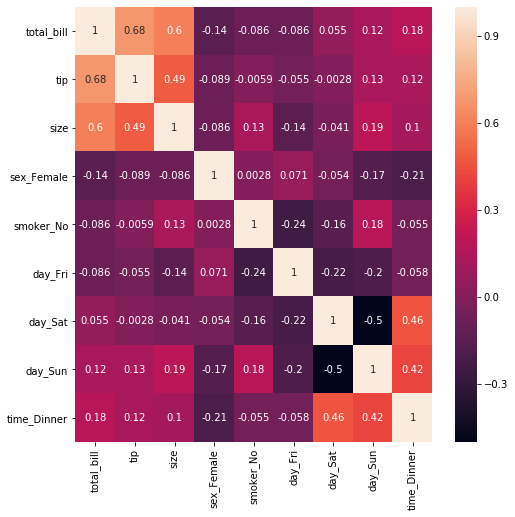

In [71]:
plt.figure(figsize  = (8,8))
sns.heatmap(tips.corr(), annot = True)

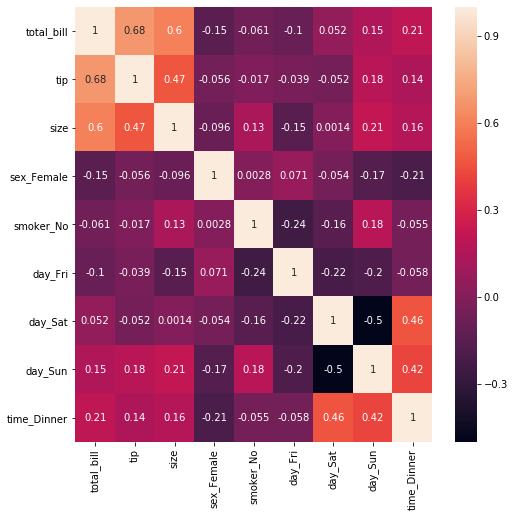

In [72]:
plt.figure(figsize  = (8,8))
sns.heatmap(tips.corr('spearman'), annot = True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop('tip', axis = 1), tips['tip'], test_size = 0.3, 
                                                    random_state = 101)

In [73]:
vif = [variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
pd.Series(vif, index = X_train.columns, name ='VIF')

total_bill      9.068089
size           12.033789
sex_Female      1.465544
smoker_No       2.422065
day_Fri         2.529861
day_Sat        17.397416
day_Sun        14.694187
time_Dinner    30.744333
Name: VIF, dtype: float64

In [66]:
sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     22.85
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.37e-23
Time:                        09:36:02   Log-Likelihood:                -232.39
No. Observations:                 170   AIC:                             482.8
Df Residuals:                     161   BIC:                             511.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4233      0.304      1.391      0.166      -0.178       1.024
total_bill      0.1083      0.011      9.801      0.000       0.086       0.130
size            0.1438      0.104      1.379      0.170      -0.062       0.350
sex_Female      0.0718      0.162      0.444      0.658      -0.247       0.391
smoker_No       0.2102      0.170      1.236      0.218      -0.126       0.546
day_Fri         0.2098      0.412      0.509      0.612      -0.604       1.024
day_Sat         0.1611      0.537      0.300      0.764      -0.899       1.221
day_Sun         0.0520      0.535      0.097      0.923      -1.005       1.109
time_Dinner    -0.1633      0.495     -0.330      0.742      -1.141       0.815
==============================================================================
Omnibus:                       10.003   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               18.760
Skew:                           0.212   Prob(JB):                     8.44e-05
Kurtosis:                       4.571   Cond. No.                         268.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lm_tips = LinearRegression()
lm_tips.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lm_tips.intercept_

0.42328249317459443

In [69]:
pd.DataFrame(index = X_train.columns, data = lm_tips.coef_, columns=['Coefficient'])

,Coefficient
total_bill,0.108300
size,0.143763
sex_Female,0.071772
smoker_No,0.210216
day_Fri,0.209814
day_Sat,0.161066
day_Sun,0.051977
time_Dinner,-0.163317


## Predicting Train Data

Text(0, 0.5, 'predicted Y')

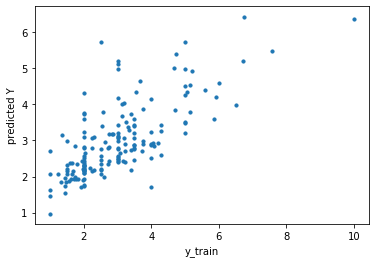

In [74]:
predictions = lm_tips.predict(X_train)

plt.scatter(y_train, predictions, s=10)
plt.xlabel('y_train')
plt.ylabel('predicted Y')

In [82]:
#MSE
sum((y_train - predictions)**2)/ len(y_train)

#RMSE
np.sqrt(sum((y_train - predictions)**2)/ len(y_train))

0.9493630186311846

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R2 Score:', metrics.r2_score(y_train,predictions))

MAE: 0.7032511490019798
MSE: 0.9012901411445148
RMSE: 0.9493630186311846
R2 Score: 0.53168845152304


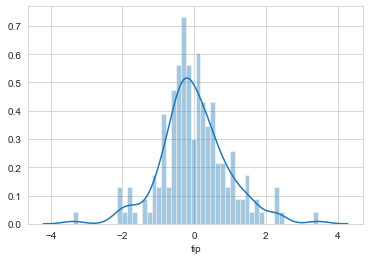

In [70]:
sns.set_style(style = 'whitegrid')
sns.distplot((y_train-predictions),bins = 50)

In [84]:
residual = y_train - predictions

In [85]:
try_normal(residual)

{'Anderson': {15.0: 0.563,
  10.0: 0.641,
  5.0: 0.77,
  2.5: 0.898,
  1.0: 1.068,
  'stat': 1.3234004951050622},
 'Shapiro': 0.005452786106616259,
 'K^2': 0.006728192818993765}

In [86]:
diagnostic.acorr_ljungbox(residual , lags = 1) 

(array([0.15986133]), array([0.68928422]))

In [88]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train)
lzip(name, test)

[('F statistic', 0.5117364143876104), ('p-value', 0.9981531995789855)]

## Predicting Test Data

Text(0, 0.5, 'predicted Y')

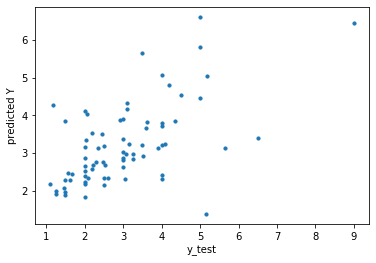

In [90]:
predictions = lm_tips.predict(X_test)
plt.scatter(y_test, predictions, s=10)
plt.xlabel('y_test')
plt.ylabel('predicted Y')

In [98]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test,predictions))

MAE: 0.843052257069498
MSE: 1.33485535630891
RMSE: 1.1553594056867802
R2 Score: 0.2843912582093555


In [92]:
residual = y_test - predictions

In [93]:
try_normal(residual)

{'Anderson': {15.0: 0.549,
  10.0: 0.625,
  5.0: 0.75,
  2.5: 0.875,
  1.0: 1.041,
  'stat': 1.5819667256018164},
 'Shapiro': 0.0004880244086962193,
 'K^2': 0.00022034876737879}

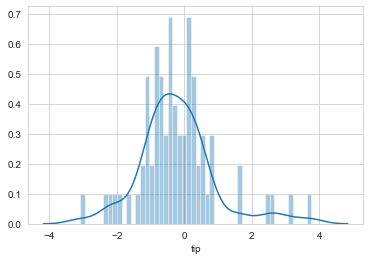

In [94]:
sns.set_style(style = 'whitegrid')
sns.distplot(residual,bins = 50)

In [95]:
diagnostic.acorr_ljungbox(residual , lags = 1) 

(array([0.71082736]), array([0.39916928]))

In [96]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
lzip(name, test)

[('F statistic', 0.44562955916134134), ('p-value', 0.9844057722991123)]

## Underfitting

Dimana model pada saat predict ke train dan test hasilnya buruk. Mungkin kekurangan data

## Overfitting

Dimana model pada saat predict ke train hasilnya bagus, tapi pada saat predict ke test hasilnya buruk. Mungkin kebanyakan fitur

In [99]:
matrix = []
for i, j in zip(predictions, y_test):
    matrix.append([i, j, abs(i-j), (abs(i-j)/j)*100])
selisih = pd.DataFrame(matrix, columns = ['Prediction', 'Actual', 'Selisih', 'Selisih %'])    
selisih.head()

,Prediction,Actual,Selisih,Selisih %
0,2.231664,2.00,0.231664,11.583198
1,2.844349,3.27,0.425651,13.016859
2,2.330104,4.00,1.669896,41.747409
3,3.832081,3.61,0.222081,6.151818
4,3.809614,4.00,0.190386,4.759657


In [100]:
print('Jumlah prediksi yang menyimpang diatas 20% : {}'.format(len(selisih[selisih['Selisih %'] > 20])))
print('Presentasi prediksi yang menyimpang diatas 20% : {}%'.format(((len(selisih[selisih['Selisih %'] > 20])/len(predictions))*100)))
selisih[selisih['Selisih %'] > 20]

Jumlah prediksi yang menyimpang diatas 20% : 40
Presentasi prediksi yang menyimpang diatas 20% : 54.054054054054056%


,Prediction,Actual,Selisih,Selisih %
2,2.330104,4.00,1.669896,41.747409
5,2.085166,1.47,0.615166,41.847996
6,6.440440,9.00,2.559560,28.439552
8,1.384643,5.15,3.765357,73.113722
9,1.897103,1.50,0.397103,26.473505
10,3.256183,4.08,0.823817,20.191586
12,1.914431,1.25,0.664431,53.154446
16,2.421075,4.00,1.578925,39.473136
17,3.336999,2.03,1.306999,64.384206
18,2.278319,1.63,0.648319,39.774151


## Ridge Regression

In [101]:
from sklearn.linear_model import Ridge

In [121]:
rlm = Ridge(alpha = 1)

In [122]:
rlm.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

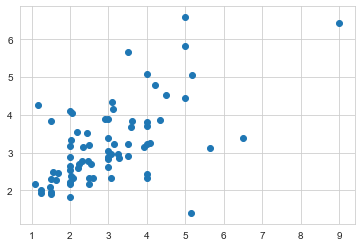

In [104]:
predictions = rlm.predict(X_test)
plt.scatter(y_test, predictions)

In [105]:
rlm.intercept_

0.42594047860275497

In [125]:
X_train.columns

Index(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat',
       'day_Sun', 'time_Dinner'],
      dtype='object')

In [123]:
rlm.coef_

array([ 0.10813032,  0.14297591,  0.06815523,  0.19952432,  0.15256844,
        0.08521681, -0.01818606, -0.09691718])

In [106]:
rlm.coef_

array([ 0.10827217,  0.14373395,  0.07130363,  0.20886107,  0.2003364 ,
        0.1477093 ,  0.0392559 , -0.1514692 ])

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', lm_tips.score(X_test, y_test))

MAE: 0.8429241704827286
MSE: 1.3345937974599402
RMSE: 1.1552462064252538
R2 Score: 0.2843912582093555


## Lasso Regression

In [108]:
from sklearn.linear_model import Lasso

In [149]:
llm = Lasso(alpha = 1)

In [150]:
llm.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

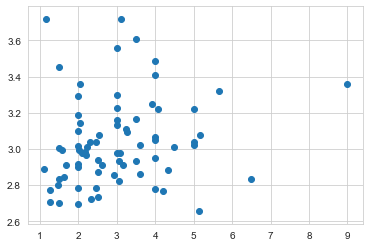

In [151]:
predictions = llm.predict(X_test)
plt.scatter(y_test, predictions)

In [152]:
llm.coef_

array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.08303597])

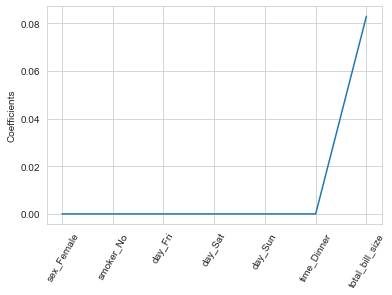

In [153]:
_ = plt.plot(range(len(X_train.columns)), llm.coef_)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', llm.score(X_test, y_test))

MAE: 0.8260856898820517
MSE: 1.3192354526202195
RMSE: 1.1485797545752838
R2 Score: 0.29276500415323303


In [137]:
tips['total_bill_size']  = tips['total_bill'] / tips['size']

In [138]:
tips

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill_size
0,16.99,1.01,2,1,1,0,0,1,1,8.495000
1,10.34,1.66,3,0,1,0,0,1,1,3.446667
2,21.01,3.50,3,0,1,0,0,1,1,7.003333
3,23.68,3.31,2,0,1,0,0,1,1,11.840000
4,24.59,3.61,4,1,1,0,0,1,1,6.147500
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1,9.676667
240,27.18,2.00,2,1,0,0,1,0,1,13.590000
241,22.67,2.00,2,0,0,0,1,0,1,11.335000
242,17.82,1.75,2,0,1,0,1,0,1,8.910000


In [139]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop(['tip', 'total_bill', 'size'], axis = 1), tips['tip'], test_size = 0.3, 
                                                    random_state = 101)

In [140]:
llm.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
llm.coef_

array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.18931823])

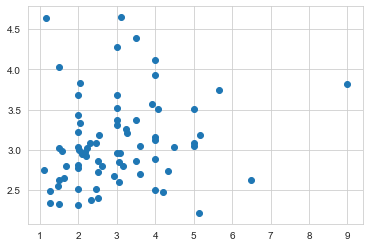

In [142]:
predictions = llm.predict(X_test)
plt.scatter(y_test, predictions)

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', llm.score(X_test, y_test))

MAE: 1.039632162647546
MSE: 1.9098948630835786
RMSE: 1.381989458383666
R2 Score: -0.023884313355795994
